In [120]:
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv(r"C:\Users\ibnul\hp3.csv",encoding='latin1')

In [122]:
df.head()

,Property Type,Bed,Bath,Area,Location,Price
0,Apartment,1,1,500,Mohammadpur,"1,700,000"
1,Apartment,2,2,675,Mohammadpur,"2,500,000"
2,Apartment,2,2,600,Mohammadpur,"2,600,000"
3,Apartment,2,2,600,Mohammadpur,"2,600,000"
4,Apartment,3,2,800,Mohammadpur,"2,700,000"


In [123]:
df.shape

(5038, 6)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property Type  5038 non-null   object
 1   Bed            5038 non-null   int64 
 2   Bath           5038 non-null   int64 
 3   Area           5038 non-null   object
 4   Location       5038 non-null   object
 5   Price          5038 non-null   object
dtypes: int64(2), object(4)
memory usage: 236.3+ KB


In [125]:
df['Price'] = (df['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df['Area'] = (df['Area'].str.split()).apply(lambda x: int(x[0].replace(',', '')))

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property Type  5038 non-null   object 
 1   Bed            5038 non-null   int64  
 2   Bath           5038 non-null   int64  
 3   Area           5038 non-null   int64  
 4   Location       5038 non-null   object 
 5   Price          5038 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 236.3+ KB


In [127]:
df = df.drop(['Property Type'],axis='columns')

In [128]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location']


In [129]:
dummies = pd.get_dummies(df.Location)

In [130]:
df = pd.concat([df,dummies],axis='columns')


In [131]:
df[2025:2030]

,Bed,Bath,Area,Location,Price,Badda,Banani,Bashabo,Bashundhara,Dhanmondi,Mirpur,Mohammadpur,Savar,Uttara
2025,3,3,1450,Mirpur,8700000.0,0,0,0,0,0,1,0,0,0
2026,3,3,1450,Mirpur,8700000.0,0,0,0,0,0,1,0,0,0
2027,3,3,1450,Mirpur,8700000.0,0,0,0,0,0,1,0,0,0
2028,3,2,1250,Mirpur,8750000.0,0,0,0,0,0,1,0,0,0
2029,3,2,1250,Mirpur,8750000.0,0,0,0,0,0,1,0,0,0


In [132]:
df = df.drop('Location',axis='columns')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bed          5038 non-null   int64  
 1   Bath         5038 non-null   int64  
 2   Area         5038 non-null   int64  
 3   Price        5038 non-null   float64
 4   Badda        5038 non-null   uint8  
 5   Banani       5038 non-null   uint8  
 6   Bashabo      5038 non-null   uint8  
 7   Bashundhara  5038 non-null   uint8  
 8   Dhanmondi    5038 non-null   uint8  
 9   Mirpur       5038 non-null   uint8  
 10  Mohammadpur  5038 non-null   uint8  
 11  Savar        5038 non-null   uint8  
 12  Uttara       5038 non-null   uint8  
dtypes: float64(1), int64(3), uint8(9)
memory usage: 201.8 KB


In [134]:
X = df.drop(['Price'],axis='columns')

In [135]:
X.head()

,Bed,Bath,Area,Badda,Banani,Bashabo,Bashundhara,Dhanmondi,Mirpur,Mohammadpur,Savar,Uttara
0,1,1,500,0,0,0,0,0,0,1,0,0
1,2,2,675,0,0,0,0,0,0,1,0,0
2,2,2,600,0,0,0,0,0,0,1,0,0
3,2,2,600,0,0,0,0,0,0,1,0,0
4,3,2,800,0,0,0,0,0,0,1,0,0


In [136]:
y = df.Price

In [137]:
y

0        1700000.0
1        2500000.0
2        2600000.0
3        2600000.0
4        2700000.0
           ...    
5033    10275000.0
5034    11120000.0
5035    11120000.0
5036    18000000.0
5037    18000000.0
Name: Price, Length: 5038, dtype: float64

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [139]:
model.fit(X,y)
model.score(X,y)

0.620825950778148

In [140]:
model.predict([[3,3,1450,0,0,0,0,0,0,1,0,0]])

array([8438588.81317198])

In [141]:
x = np.zeros(len(X.columns))

In [142]:
X.columns

Index(['Bed', 'Bath', 'Area', 'Badda', 'Banani', 'Bashabo', 'Bashundhara',
       'Dhanmondi', 'Mirpur', 'Mohammadpur', 'Savar', 'Uttara'],
      dtype='object')

In [143]:
    x[0] = 1
    x[1] = 2
    x[2] = 3
    x[3] = 4
    x[4] = 5
    x[5] = 6
    x[6] = 7
    x[7] = 8
    x[9] = 9
    x[10] = 10
    x[11] = 11

In [144]:
def predict_price(Bed,Bath,Area,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [145]:
model.predict([[3,3,1450,0,0,0,0,0,0,1,0,0]])

array([8438588.81317198])

In [146]:
import pickle
with open('Price_Prediction.pickle','wb') as f:
    pickle.dump(model,f)

In [147]:
model.predict([[2,2,1200,0,0,0,0,0,0,0,0,1]])



array([7687971.96859818])

In [148]:
model.predict([[2,2,1400,0,0,1,0,0,0,0,0,0]])

array([7599986.65689686])

In [149]:
model.predict([[2,2,1400,0,0,1,0,0,0,0,0,0]])

array([7599986.65689686])

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [151]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3550915945858002

In [152]:
y_pred = lr_clf.predict(X_test)

In [153]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

NameError: name 'plt' is not defined

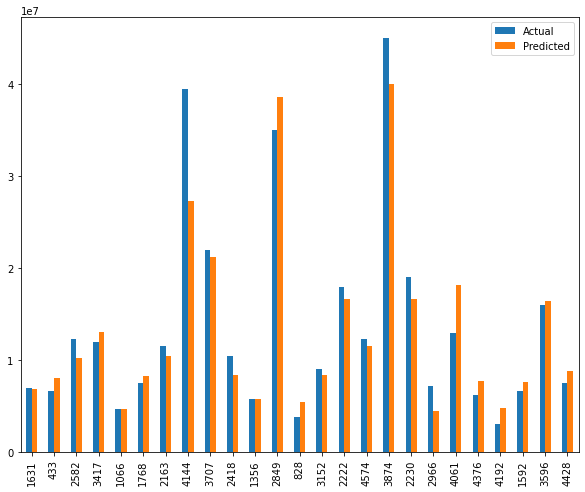

In [154]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [155]:
model.predict([[2,2,1400,0,0,1,0,0,0,0,0,0]])

array([7599986.65689686])